In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load & process excel

In [2]:
file_path = "RB_TC_extract_2021_11_22.xlsx"
#!pip install --user openpyxl
df_fp_original = pd.read_excel(file_path, engine='openpyxl')
df_fp_original = df_fp_original.iloc[1: , :] #first line are units

In [3]:
# 9 rows contain only "Before Notebooks" and "After Notebooks" information, which need to be droped
df_fp_original = df_fp_original.loc[df_fp_original['Date (FGC)'].dropna().index.values & 
                                    df_fp_original['Time (FGC)'].dropna().index.values]
df_fp_original["Date (FGC)"] = pd.to_datetime(df_fp_original["Date (FGC)"])
df_fp_original["year"] = df_fp_original["Date (FGC)"].dt.year.dropna()
df_fp_original["month"] = df_fp_original["Date (FGC)"].dt.month.dropna()

NameError: name 'df_fp' is not defined

In [ ]:
from lhcsmapi.Time import Time

def get_unix_ts_fgc(df):
    df["Timestamp (FGC)"] = 0
    for index, row in df.iterrows():
        date_time_str = f"{row['Date (FGC)']} {row['Time (FGC)']}".replace("00:00:00 ","")
        df.loc[index,"Timestamp (FGC)"] = Time.to_unix_timestamp(date_time_str, unit="ns")
    return df
df_fp_original = get_unix_ts_fgc(df_fp_original)

In [ ]:
df_fp_original.to_csv("RB_TC_extract_2021_11_22_processed.csv")

# Load processed file

In [5]:
df_fp = pd.read_csv("RB_TC_extract_2021_11_22_processed.csv", index_col=0)

In [49]:
# one missing event
df_summary[~df_summary['Timestamp (FGC)'].isin(df_fp["Timestamp (FGC)"])]

,Date (FGC),Time (FGC),Timestamp (FGC),Circuit Name,d,circuit_type,timestamp_fgc,circuit_name,author,is_automatic,...,u_earth_rb_dfs,source_timestamp_leads_odd_df,u_hts_odd_dfs,u_res_odd_dfs,source_timestamp_leads_even_df,u_hts_even_dfs,u_res_even_dfs,t_res_body_long_dfs,st_res_overtemp_long_dfs,year
412,2021-04-15,07:58:37.820000,1618466317820000000,RB.A34,"DataFrame:(7,)",scalar,scalar,scalar,scalar,scalar,...,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,2021


# Load data summary

In [7]:
data_summary_name = "info_summary.csv"
df_summary = pd.read_csv(data_summary_name, index_col=0)

id_columns = ['Date (FGC)', 'Time (FGC)', 'Timestamp (FGC)', 'Circuit Name']
df_data_summary = df_summary.drop(columns = id_columns)

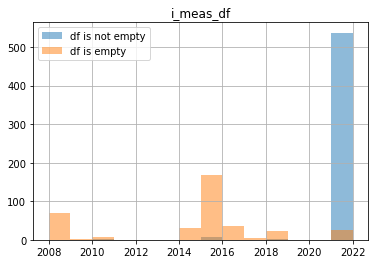

In [8]:
df_summary["Date (FGC)"] = pd.to_datetime(df_summary["Date (FGC)"])
df_summary["year"] = df_summary["Date (FGC)"].dt.year.dropna()

fig, ax = plt.subplots()
plt.title("i_meas_df")
df_summary[df_summary.i_meas_df =="DataFrame:(21000, 1)"].year.hist(ax=ax, bins=np.arange(2008, 2023), alpha =0.5, label="df is not empty")
df_summary[df_summary.i_meas_df =="DataFrame:(0, 0)"].year.hist(ax=ax, bins=np.arange(2008, 2023), alpha =0.5,  label="df is empty")
plt.legend()

In [11]:
df_summary.columns.values

array(['Date (FGC)', 'Time (FGC)', 'Timestamp (FGC)', 'Circuit Name', 'd',
       'circuit_type', 'timestamp_fgc', 'circuit_name', 'author',
       'is_automatic', 'timestamp_pic', 'i_meas_df', 'i_a_df',
       'i_earth_df', 'i_earth_pcnt_df', 'i_ref_df', 'timestamp_fgc_ref',
       'i_meas_ref_df', 'i_earth_ref_df', 'i_earth_pcnt_ref_df',
       'source_timestamp_ee_odd_df', 'timestamp_ee_odd', 'source_ee_odd',
       'u_dump_res_odd_df', 'source_timestamp_ee_even_df',
       'timestamp_ee_even', 'source_ee_even', 'u_dump_res_even_df',
       't_res_odd_0_df', 't_res_odd_1_df', 't_res_even_0_df',
       't_res_even_1_df', 'source_timestamp_ee_odd_ref_df',
       'source_timestamp_ee_even_ref_df', 't_res_odd_0_ref_df',
       't_res_odd_1_ref_df', 't_res_even_0_ref_df', 't_res_even_1_ref_df',
       'u_diode_rb_dfs', 'source_timestamp_qds_df',
       'source_timestamp_nqps_df', 'u_qds_dfs', 'u_nqps_dfs',
       'u_qds_dfs2', 'source_timestamp_qh_df', 'i_hds_dfs', 'u_hds_dfs',
       'i

In [17]:
df_summary[df_summary.i_meas_df !="DataFrame:(21000, 1)"][['Date (FGC)', 'Time (FGC)', 'Timestamp (FGC)','Circuit Name','i_meas_df']]#.to_csv('FGC_with_no_I_MEAS.csv')

,Date (FGC),Time (FGC),Timestamp (FGC),Circuit Name,i_meas_df
0,2016-06-06,08:34:04,1465194844000000000,RB.A78,"DataFrame:(0, 0)"
2,2015-02-11,16:49:30,1423669770000000000,RB.A81,"DataFrame:(0, 0)"
7,2015-03-14,13:39:43,1426336783000000000,RB.A45,"DataFrame:(0, 0)"
12,2021-06-19,00:25:03.400000,1624055103400000000,RB.A56,"DataFrame:(0, 0)"
14,2016-12-10,18:41:25,1481391685000000000,RB.A45,"DataFrame:(0, 0)"
...,...,...,...,...,...
908,2021-03-13,18:46:40,1615657600000000000,RB.A78,"DataFrame:(0, 0)"
909,2015-03-01,07:34:08,1425191648000000000,RB.A78,"DataFrame:(0, 0)"
913,2018-12-08,21:18:07,1544300287000000000,RB.A45,"DataFrame:(0, 0)"
916,2014-12-03,07:58:02,1417589882000000000,RB.A67,"DataFrame:(0, 0)"


In [9]:
df_summary[df_summary.i_meas_df =="DataFrame:(21000, 1)"]

,Date (FGC),Time (FGC),Timestamp (FGC),Circuit Name,d,circuit_type,timestamp_fgc,circuit_name,author,is_automatic,...,u_earth_rb_dfs,source_timestamp_leads_odd_df,u_hts_odd_dfs,u_res_odd_dfs,source_timestamp_leads_even_df,u_hts_even_dfs,u_res_even_dfs,t_res_body_long_dfs,st_res_overtemp_long_dfs,year
1,2021-05-23,14:46:46,1621774006000000000,RB.A23,"DataFrame:(6,)",scalar,scalar,scalar,scalar,scalar,...,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,2021
3,2021-05-01,19:48:08.980000,1619891288980000000,RB.A34,"DataFrame:(7,)",scalar,scalar,scalar,scalar,scalar,...,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,2021
4,2021-04-15,21:42:34.660000,1618515754660000000,RB.A34,"DataFrame:(7,)",scalar,scalar,scalar,scalar,scalar,...,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,2021
5,2021-07-22,20:04:54.680,1626977094680000000,RB.A67,"DataFrame:(6,)",scalar,scalar,scalar,scalar,scalar,...,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,2021
6,2021-05-24,17:22:30.460000,1621869750460000000,RB.A56,"DataFrame:(6,)",scalar,scalar,scalar,scalar,scalar,...,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,2021-06-15,19:55:14.340,1623779714340000000,RB.A56,"DataFrame:(6,)",scalar,scalar,scalar,scalar,scalar,...,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,2021
912,2021-05-10,15:53:07.440,1620654787440000000,RB.A23,"DataFrame:(6,)",scalar,scalar,scalar,scalar,scalar,...,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,2021
914,2021-04-29,07:33:55.020000,1619674435020000000,RB.A12,"DataFrame:(7,)",scalar,scala

In [10]:
for column in df_data_summary.columns:
    print(df_data_summary[column].value_counts())
    print( )

DataFrame:(6,)    491
DataFrame:(7,)    428
Name: d, dtype: int64

scalar    919
Name: circuit_type, dtype: int64

scalar    919
Name: timestamp_fgc, dtype: int64

scalar    919
Name: circuit_name, dtype: int64

scalar    919
Name: author, dtype: int64

scalar    919
Name: is_automatic, dtype: int64

list <class 'numpy.int64'> with len 2    876
list <class 'float'> with len 2           43
Name: timestamp_pic, dtype: int64

DataFrame:(21000, 1)    548
DataFrame:(0, 0)        371
Name: i_meas_df, dtype: int64

DataFrame:(8192, 1)    548
DataFrame:(0, 0)       371
Name: i_a_df, dtype: int64

DataFrame:(1024, 1)    548
DataFrame:(0, 0)       371
Name: i_earth_df, dtype: int64

DataFrame:(21000, 1)    548
DataFrame:(0, 0)        371
Name: i_earth_pcnt_df, dtype: int64

DataFrame:(21000, 1)    548
DataFrame:(0, 0)        371
Name: i_ref_df, dtype: int64

scalar    919
Name: timestamp_fgc_ref, dtype: int64

DataFrame:(21000, 1)    919
Name: i_meas_ref_df, dtype: int64

DataFrame:(1024, 1)    

In [11]:
# Events with data
df_data_summary[(df_summary.i_meas_df =="DataFrame:(21000, 1)") &
                (df_summary.u_diode_rb_dfs=="list <class 'pandas.core.frame.DataFrame'> with len 154") &
                (df_summary.i_hds_dfs != "empty list")]

,d,circuit_type,timestamp_fgc,circuit_name,author,is_automatic,timestamp_pic,i_meas_df,i_a_df,i_earth_df,...,i_meas_u_diode_nxcals_dfs,u_earth_rb_dfs,source_timestamp_leads_odd_df,u_hts_odd_dfs,u_res_odd_dfs,source_timestamp_leads_even_df,u_hts_even_dfs,u_res_even_dfs,t_res_body_long_dfs,st_res_overtemp_long_dfs
1,"DataFrame:(6,)",scalar,scalar,scalar,scalar,scalar,list <class 'numpy.int64'> with len 2,"DataFrame:(21000, 1)","DataFrame:(8192, 1)","DataFrame:(1024, 1)",...,list <class 'tuple'> with len 4,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...
3,"DataFrame:(7,)",scalar,scalar,scalar,scalar,scalar,list <class 'numpy.int64'> with len 2,"DataFrame:(21000, 1)","DataFrame:(8192, 1)","DataFrame:(1024, 1)",...,list <class 'tuple'> with len 4,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...
4,"DataFrame:(7,)",scalar,scalar,scalar,scalar,scalar,list <class 'numpy.int64'> with len 2,"DataFrame:(21000, 1)","DataFrame:(8192, 1)","DataFrame:(1024, 1)",...,list <class 'tuple'> with len 4,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...
5,"DataFrame:(6,)",scalar,scalar,scalar,scalar,scalar,list <class 'numpy.int64'> with len 2,"DataFrame:(21000, 1)","DataFrame:(8192, 1)","DataFrame:(1024, 1)",...,list <class 'tuple'> with len 5,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...
6,"DataFrame:(6,)",scalar,scalar,scalar,scalar,scalar,list <class 'numpy.int64'> with len 2,"DataFrame:(21000, 1)","DataFrame:(8192, 1)","DataFrame:(1024, 1)",...,list <class 'tuple'> with len 7,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,"DataFrame:(6,)",scalar,scalar,scalar,scalar,scalar,list <class 'float'> with len 2,"DataFrame:(21000, 1)","DataFrame:(8192, 1)","DataFrame:(1024, 1)",...,list <class 'tuple'> with len 6,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,"DataFrame:(1, 2)",list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...,list <class 'pandas.core.frame.DataFrame'> wit...
912,"DataFrame:(6,)",scalar,scalar,scalar,scalar,scalar,list <class 'numpy.int64'> with len 2,"DataFrame

# Load data

In [12]:
import glob
import re
import pickle

In [13]:
eos_path = "/eos/project-m/ml-for-alarm-system/private/I_earth_data/"
file_names = glob.glob(eos_path + "data/*")

def get_filename_with_fgc_ts(fgc_ts, file_names):
    return [fns for fns in file_names if str(fgc_ts) in fns][0]

In [14]:
f =[]
for primary_quench_ts in df_fp["Timestamp (FGC)"].unique():
    file_name = get_filename_with_fgc_ts(primary_quench_ts, file_names)
    f.append(file_name)
len(f)

918

In [15]:
list_of_default_variables = [
        "d",
        "circuit_type",
        "timestamp_fgc",
        "circuit_name",
        "author",
        "is_automatic",
        "timestamp_pic",
        # PC Current
        "i_meas_df", "i_a_df", "i_earth_df", "i_earth_pcnt_df", "i_ref_df",
        "timestamp_fgc_ref",
        "i_meas_ref_df", "i_earth_ref_df", "i_earth_pcnt_ref_df",
        # EE Voltage
        "source_timestamp_ee_odd_df",
        "timestamp_ee_odd",
        "source_ee_odd",
        "u_dump_res_odd_df",
        "source_timestamp_ee_even_df",
        "timestamp_ee_even",
        "source_ee_even",
        "u_dump_res_even_df",
        # EE TEMPERATURE
        "t_res_odd_0_df",
        "t_res_odd_1_df",
        "t_res_even_0_df",
        "t_res_even_1_df",
        # EE TEMPERATURE REF
        "source_timestamp_ee_odd_ref_df",
        "source_timestamp_ee_even_ref_df",
        "t_res_odd_0_ref_df",
        "t_res_odd_1_ref_df",
        "t_res_even_0_ref_df",
        "t_res_even_1_ref_df",
        "u_diode_rb_dfs",
        # iQPS, nQPS - PM
        "source_timestamp_qds_df",
        "source_timestamp_nqps_df",
        ####results_table,
        # QDS
        "u_qds_dfs",
        "u_nqps_dfs",
        # QDS from second board (A/B)
        "u_qds_dfs2",
        # QH
        "source_timestamp_qh_df",
        "i_hds_dfs",
        "u_hds_dfs",
        # QH REF
        "i_hds_ref_dfs",
        "u_hds_ref_dfs",
        # DIODE LEADS
        "i_a_u_diode_u_ref_pm_dfs",
        "i_meas_u_diode_nxcals_dfs",
        # U_EARTH
        "u_earth_rb_dfs",
        # DFB
        "source_timestamp_leads_odd_df",
        "u_hts_odd_dfs",
        "u_res_odd_dfs",
        "source_timestamp_leads_even_df",
        "u_hts_even_dfs",
        "u_res_even_dfs",
        # EE after 3 hours
        "t_res_body_long_dfs",
        "st_res_overtemp_long_dfs",
        #####rb_analysis,
    ]

list_of_info_variables = [
    "Date (FGC)",
    "Time (FGC)",
    "Timestamp (FGC)",
    "Circuit Name"
]

In [16]:
def load_one_event(filename,list_of_default_variables,list_of_variables=None):
    
    cornichon=pickle.load(open(filename,"rb"))
    
    if list_of_variables:
        list_of_variable_to_return = list_of_variables
    else: 
        list_of_variable_to_return = list_of_default_variables
    
    quench_dict={}
    for idv, variable_name in enumerate(list_of_default_variables):
        if variable_name in list_of_variable_to_return:
            quench_dict[variable_name]=cornichon[idv]
    
    return quench_dict

In [17]:
data = load_one_event(f[500], list_of_default_variables)

# Analyze timestamps of secondary quench

In [18]:
# get quench index
quenched_magnets = data["source_timestamp_qds_df"]
quenched_magnets['index_loc'] = 0
for i, df in enumerate(data["u_diode_rb_dfs"]):
    is_quench = [b in df.columns[0] for b in quenched_magnets['source'].values.reshape(-1)]
    if sum(is_quench):
        quenched_magnets.loc[is_quench, 'index_loc'] = i
quenched_magnets

,source,timestamp,index_loc
0,C23L2,1619417171011000000,110
1,B8L2,1619417171070000000,152
2,B23L2,1619417202399000000,111
3,A8L2,1619417204201000000,153
4,A23L2,1619417223184000000,112
5,C22L2,1619417307319000000,113
6,A9L2,1619417420495000000,151


In [19]:
quenched_magnets["tdiff"] = (quenched_magnets.timestamp - quenched_magnets.timestamp[0])/1e9
quenched_magnets["tdiff_qh"] = (data["source_timestamp_qh_df"].timestamp - quenched_magnets.timestamp[0])/1e9

(-2.0, 200.0)

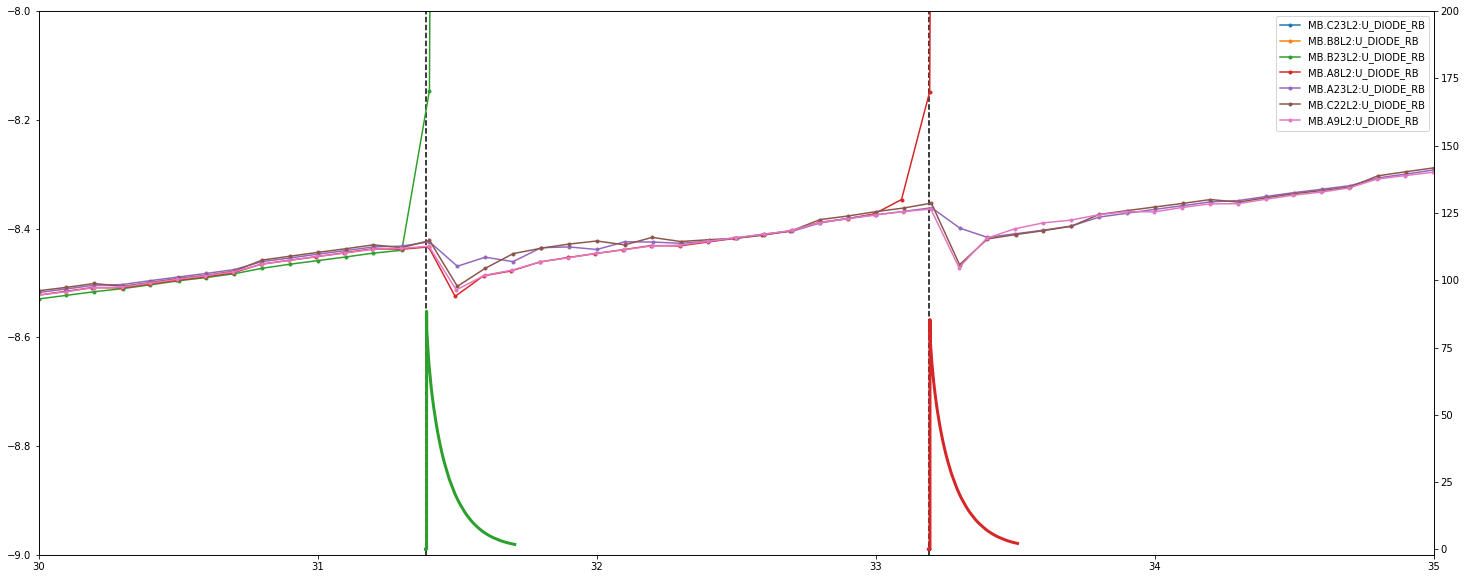

In [20]:
fig, ax = plt.subplots(figsize=(25,10))
ax2 = ax.twinx()

for t_quench in quenched_magnets["tdiff"].values:
    ax.axvline(x=t_quench, color='k', linestyle='--')
    
for i in quenched_magnets.index_loc:
    data["u_diode_rb_dfs"][i].plot(marker=".", ax=ax)

for i, qh_signal in enumerate(data["i_hds_dfs"]):
    t_offset = quenched_magnets["tdiff_qh"][i]
    
    ax2.plot(qh_signal[0].index + t_offset , qh_signal[0].values, linewidth=3)


ax.set_xlim((30,35))
ax.set_ylim((-9,-8))

ax2.set_ylim((-2,200))

# Make db with secondary quenches

In [21]:
# pip install xarray
import xarray as xr

In [22]:
list_of_costom_variables = [
        "u_diode_rb_dfs",
        "source_timestamp_qds_df",
    ]

In [23]:
def apply_conditions(df, **kwargs):
    for key, value in kwargs.items():
        df = df[df[key]==value]
    return df
        
df_test = pd.DataFrame(np.ones((3,3)), columns=["a","b","c"])

apply_conditions(df_test, a=1)

,a,b,c
0,1.0,1.0,1.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0


In [24]:
n_secondary_quench=0
quench_nr = 0
sec_q_after_sig = 0
n_quench = 0

for fgc_timestamp in df_fp["Timestamp (FGC)"].unique():
    file_name = get_filename_with_fgc_ts(fgc_timestamp, file_names)
    
    if (df_summary[df_summary["Timestamp (FGC)"]==fgc_timestamp].i_meas_df.values[0] == "DataFrame:(21000, 1)") & \
        (df_summary[df_summary["Timestamp (FGC)"]==fgc_timestamp].source_timestamp_qds_df.values[0] != "DataFrame:(0, 0)"):  # i_meas exists & timestamp exists
            
        data = load_one_event(file_name, list_of_default_variables, list_of_costom_variables)
             

        if (len(data["u_diode_rb_dfs"][0]) > 0): # sometimes no note in list, or u-diode empty          
            n_quench += len(data["source_timestamp_qds_df"])  
            n_secondary_quench += len(data["source_timestamp_qds_df"][1:]) 
        
print(f"{n_quench} quenches accessible, {n_quench-n_secondary_quench} primary, {n_secondary_quench} secondary")

2551 quenches accessible, 511 primary, 2040 secondary


In [25]:
n_secondary_quench=0
data = np.zeros((2178, 154, 15))
xdf = xr.DataArray(data, dims=['quench_nr','signal','samples']) # 2178 x 154 x 100

quench_nr = 0
sec_q_after_sig = 0
for fgc_timestamp in df_fp["Timestamp (FGC)"].unique():
    file_name = get_filename_with_fgc_ts(fgc_timestamp, file_names)
    

    if (df_summary[df_summary["Timestamp (FGC)"]==fgc_timestamp].i_meas_df.values[0] == "DataFrame:(21000, 1)") & \
        (df_summary[df_summary["Timestamp (FGC)"]==fgc_timestamp].source_timestamp_qds_df.values[0] != "DataFrame:(0, 0)"):   
            
        data = load_one_event(file_name, list_of_default_variables, list_of_costom_variables)
        
        n_secondary_quench += len(data["source_timestamp_qds_df"].timestamp[1:])
        
        for i, secondary_quench_ts in enumerate(data["source_timestamp_qds_df"].timestamp):
            if (len( df_fp[df_fp["Timestamp (FGC)"] == fgc_timestamp]['Type of Quench']) > i )& \
                (len(data["u_diode_rb_dfs"][0]) >0): # sometimes no note in list, or u-diode empty

                if df_fp[df_fp["Timestamp (FGC)"] == fgc_timestamp]['Type of Quench'].iloc[i] == "GHe propagation":

                    primary_quench_ts = data["source_timestamp_qds_df"].timestamp[0]
                    distance_to_primary = (secondary_quench_ts - primary_quench_ts)/1e9
                    for k, df_signal in enumerate(data["u_diode_rb_dfs"]):
                        if (df_signal.index[-1] - df_signal.index[0]) > distance_to_primary: #if signal long enougth
                            xdf[quench_nr, k, :] = df_signal[(df_signal.index - df_signal.index[0]) > distance_to_primary].iloc[:15].values.reshape(-1)
                        else:
                            sec_q_after_sig +=1
                            print(f"seconday quench after signal {sec_q_after_sig}")
                    quench_nr += 1
                    print(quench_nr)   

1
2
3
4
5
6
7
seconday quench after signal 1
seconday quench after signal 2
seconday quench after signal 3
seconday quench after signal 4
seconday quench after signal 5
seconday quench after signal 6
seconday quench after signal 7
seconday quench after signal 8
seconday quench after signal 9
seconday quench after signal 10
seconday quench after signal 11
seconday quench after signal 12
8
seconday quench after signal 13
seconday quench after signal 14
seconday quench after signal 15
seconday quench after signal 16
seconday quench after signal 17
seconday quench after signal 18
seconday quench after signal 19
seconday quench after signal 20
seconday quench after signal 21
seconday quench after signal 22
seconday quench after signal 23
seconday quench after signal 24
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
8

1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816


In [26]:
with open('seconday_quench_dataset.pickle', 'wb') as handle:
    pickle.dump(xdf[:1811], handle, protocol=pickle.HIGHEST_PROTOCOL)

# Use existing dataset 

In [27]:
with open('seconday_quench_dataset.pickle', 'rb') as handle:
    data = pickle.load(handle)

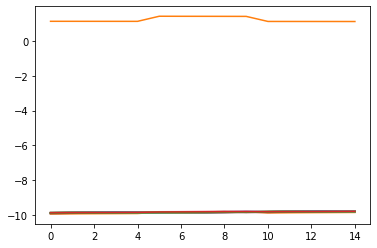

In [28]:
plt.plot(data[40,:,:].T)
plt.show()

In [29]:
np.mean(event, axis=1)

NameError: name 'event' is not defined

In [ ]:
feature_names = ["mean", "std"]
feature_df = pd.DataFrame(np.zeros((len(data),len(feature_names))), columns=feature_names)

for i, event in enumerate(data):
    magnets_without_quench = event[((np.mean(event)+ 2*np.std(event)) > np.mean(event, axis=1)) & ((np.mean(event) - 2*np.std(event)) < np.mean(event, axis=1))  ]
    
    feature_df.loc[i, "std"] = np.std(magnets_without_quench)
    feature_df.loc[i, "mean"] = np.mean(magnets_without_quench)

In [ ]:
feature_df["std"].iloc[1]

In [ ]:
highstd_event_index = feature_df["std"].sort_values(ascending=False).index

for i in highstd_event_index[:100]:
    plt.figure()
    plt.plot(data[i].T)
    plt.title(feature_df["std"].iloc[i])

In [ ]:
data_sorted = data[np.argsort(np.std(np.std(data, axis=2), axis=1))]

In [ ]:
plt.plot(data_sorted[100,:,:].T)
plt.show()

In [ ]:
ds = xr.Dataset({"foo": (("x", "y", "z"), [[[42]]]), "bar": (("y", "z"), [[24]])})


In [ ]:
np.std(data, axis=2)